In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Sarsa(alpha, eps, gamma, n, stochastic,extra_action = False):
    if extra_action: 
        w = 9
    else:
        w = 8
    Q = np.zeros([w,7,10])
    start = [3,0]
    goal = [3,7]
    steps_arr =np.zeros(n)
    
    for k in range(n):
        if k > 5000 and k%100 == 0:                          #after 5000 runs we gradually lower our exploration rate
            eps = eps/2
        s = start
        steps = 0
        if np.random.rand() > eps:                           #the next few lines find the argmax and breaks ties randomly
            maxim = Q[0][tuple(s)]-5
            for i in range(w):
                if Q[i][tuple(s)] > maxim:
                    index = []
                    index.append(i)
                    maxim = Q[i][tuple(s)]
                elif Q[i][tuple(s)] == maxim:
                    index.append(i)
            a = index[np.random.randint(0,len(index)+0.5)]
        else:                                               #take random action  
            a = np.random.randint(0,w)
            
        while s!= goal:
            steps += 1
            
            #state we land in after taking action a
            if stochastic:
                s_next = action_eval_stochastic(a,s)
            else:
                s_next = action_eval(a,s)
            
            #Choose A' from S' epsilon-greedy
            if np.random.rand() > eps:
                maxim = Q[0][tuple(s_next)]-5
                for i in range(w):
                    if Q[i][tuple(s_next)] > maxim:
                        index = []
                        index.append(i)
                        maxim = Q[i][tuple(s_next)]
                    elif Q[i][tuple(s)] == maxim:
                        index.append(i)
                a_next = index[np.random.randint(0,len(index)+0.5)]
            else:
                a_next = np.random.randint(0,w)
            
            #Update rule from the book
            Q[a][tuple(s)] = Q[a][tuple(s)] + alpha*(-1+gamma*Q[a_next][tuple(s_next)]-Q[a][tuple(s)])
            
            s = s_next
            a = a_next
        steps_arr[k] = steps
            
    return Q,steps_arr

In [3]:
def action_eval(a,s):
    if s[1] == 3 or s[1] ==4 or s[1] == 5 or s[1] == 8:
        s = list(sum(z) for z in zip(s,take_action(a)))
        s[0]-=1
    elif s[1] == 6 or s[1] == 7:
        s = list(sum(z) for z in zip(s,take_action(a)))
        s[0]-=2
    else:
        s = list(sum(z) for z in zip(s,take_action(a)))
    #if we were to overshoot we instead stay at the edge
    if s[0]<0:
        s[0] =0
    if s[0] > 6:
        s[0] = 6
    if s[1]< 0:
        s[1] = 0
    if s[1] > 9:
        s[1] = 9
    return s

In [4]:
def action_eval_stochastic(a,s):
    k = np.random.randint(0,3)
    if s[1] == 3 or s[1] ==4 or s[1] == 5 or s[1] == 8:
        s = list(sum(z) for z in zip(s,take_action(a)))
        if k == 0:
            s[0]-=1
        elif k == 1:
            s[0]-=2
    elif s[1] == 6 or s[1] == 7:
        s = list(sum(z) for z in zip(s,take_action(a)))
        if k ==0:
            s[0]-=2
        elif k ==1:
            s[0]-=3
        elif k==2:
            s[0]-=1
    else:
        s = list(sum(z) for z in zip(s,take_action(a)))
    #if we were to overshoot we instead stay at the edge
    if s[0]<0:
        s[0] =0
    if s[0] > 6:
        s[0] = 6
    if s[1]< 0:
        s[1] = 0
    if s[1] > 9:
        s[1] = 9
    return s

In [5]:
def take_action(a): #actions ordered counter-clockwise starting with a=0 moving right
    if a == 0:
        return (0,1)
    if a == 1:
        return (-1,1)
    if a == 2:
        return (-1,0)
    if a == 3:
        return (-1,-1)
    if a == 4:
        return (0,-1)
    if a == 5:
        return (1,-1)
    if a == 6:
        return (1,0)
    if a == 7:
        return (1,1)
    if a == 8:
        return (0,0)

In [9]:
alpha = 0.5
gamma = 0.7
eps = 0.1
n = 8000
S,R = Sarsa(alpha, eps, gamma, n,False)

In [7]:
print(R[-100:-1])
print(S)

[15. 17. 23.  8.  8.  8.  8. 36.  8. 10. 20. 15. 13. 16. 21. 22.  9. 14.
 12.  8.  8. 23. 16.  8. 15.  8.  8.  8.  8.  9. 15.  8.  8.  8.  8.  9.
  8.  8.  9. 17. 19. 25.  8. 15.  9. 15.  8. 13.  9. 15.  8. 22.  9.  8.
 11.  9. 14. 20. 13. 12. 19. 11. 12. 10.  8.  8. 33.  8. 10. 14. 12. 14.
 14. 14.  8.  8. 16.  8.  8.  9.  8. 10.  8. 10. 40. 13. 20.  8. 14. 20.
 39. 15. 19. 10.  8. 15. 15.  8.  8.]
[[[-3.31469871 -3.31803777 -3.31842139 -3.32180644 -3.32359236
   -3.31608426 -3.21930875 -3.18996146 -3.27515033 -3.26274558]
  [-3.31111058 -3.31305424 -3.31907815 -3.31874481 -3.30992518
   -3.31230011 -3.2205498  -3.28754766 -3.2885306  -3.24909067]
  [-3.31378334 -3.31449285 -3.30950367 -3.31428336 -3.31666093
   -3.3107733  -3.29525661 -3.15372954 -3.24617346 -3.19903588]
  [-3.29787359 -3.28845347 -3.29362957 -3.31266692 -3.30798839
   -3.29653478 -3.29617585  0.         -3.00627387 -3.21849948]
  [-3.29011709 -3.1788959  -3.2863032  -3.29835577 -3.25690348
   -3.30084355 -3.25082413

<IPython.core.display.Javascript object>


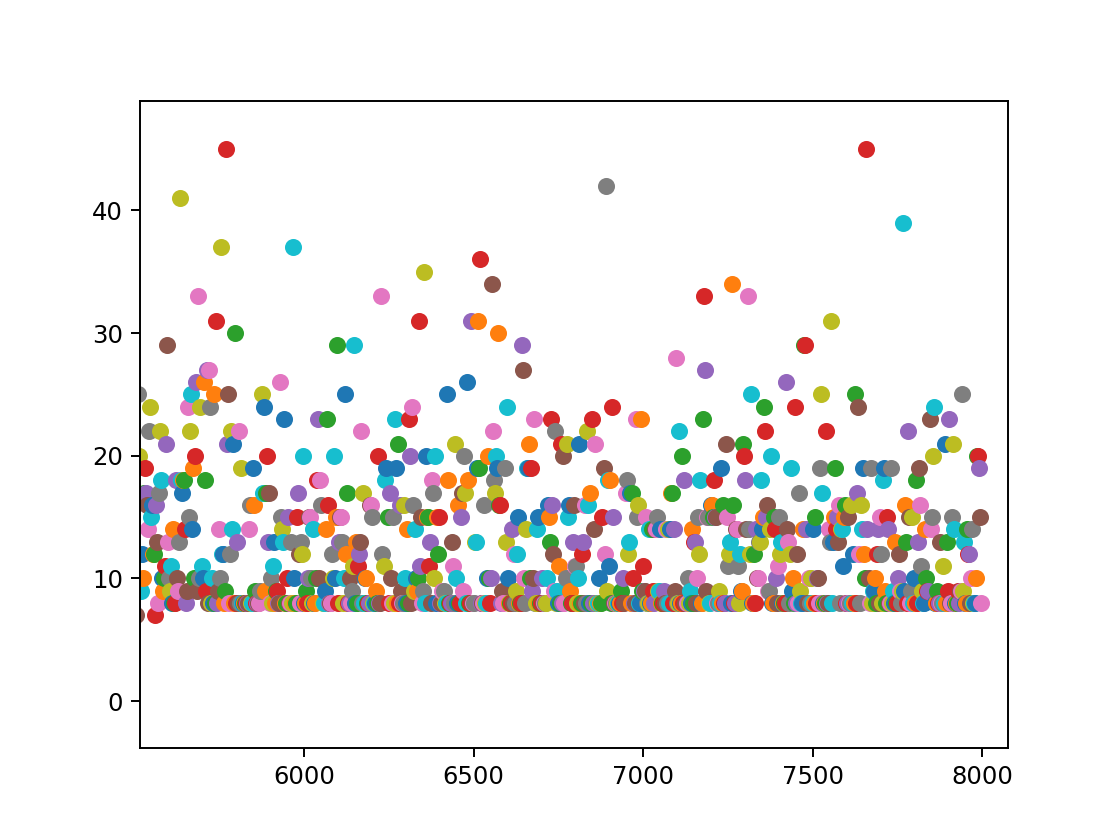

In [8]:
%matplotlib notebook

for i in range(n):
    if i%3 == 0:
        plt.scatter(i,R[i])